<a href="https://colab.research.google.com/github/mustofakamal1/Rare-Metal-Price-Prediction-with-Supply-and-Demand/blob/master/Rare%20Metal%20Price%20Prediction%20with%20Supply%20and%20Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project UAS**
Mustofa Kamal
1706043020


## Import

In [0]:
import pandas as pd
import numpy as np
import scipy
import statistics 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import datetime
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [0]:
#Fetch Data
H_PLA = pd.read_csv('https://raw.githubusercontent.com/mustofakamal1/Price-Visualization/master/Datasheet/JOHNMATT-PLAT.csv')
S_PLA = pd.read_csv('https://raw.githubusercontent.com/mustofakamal1/Price-Visualization/master/Datasheet/JOHNMATT-PLATINUM.csv')
H_PAL = pd.read_csv('https://raw.githubusercontent.com/mustofakamal1/Price-Visualization/master/Datasheet/JOHNMATT-PALL.csv')
S_PAL = pd.read_csv('https://raw.githubusercontent.com/mustofakamal1/Price-Visualization/master/Datasheet/JOHNMATT-PALLADIUM.csv')
H_GLD = pd.read_csv('https://raw.githubusercontent.com/mustofakamal1/Price-Visualization/master/Datasheet/Gold_Price.csv')
S_GLD = pd.read_csv('https://raw.githubusercontent.com/mustofakamal1/Price-Visualization/master/Datasheet/Gold_Supply_Demands.csv')
H_GLD['Date'] = pd.to_datetime(H_GLD.Date)
S_GLD.Date = pd.to_datetime(S_GLD.Date, format='%Y')
S_GLD.Date = S_GLD.Date.dt.strftime('%Y-%m-%d')
H_GLD.Date = H_GLD.Date.dt.strftime('%Y-%m-%d')
H_GLD = H_GLD.sort_values(['Date'], ascending=[True])
H_PLA = H_PLA.sort_values(['Date'], ascending=[True])
H_PAL = H_PAL.sort_values(['Date'], ascending=[True])
H_GLD = H_GLD.reset_index(drop=True)
H_PAL = H_PAL.reset_index(drop=True)
H_PLA = H_PLA.reset_index(drop=True)
#AVG Price
H_PLA['Price'] = H_PLA[['Hong Kong 8:30', 'Hong Kong 14:00', 'London 09:00', 'New York 9:30']].mean(axis=1)
H_PAL['Price'] = H_PAL[['Hong Kong 8:30', 'Hong Kong 14:00', 'London 09:00', 'New York 9:30']].mean(axis=1)

## Visualization Datasheet

In [26]:
#Visualization
fig = go.Figure()
fig.add_trace(go.Scatter(x=H_PLA.Date, y=H_PLA['Price'], name="Platinum Price",
                         line_color='deepskyblue'))
fig.add_trace(go.Scatter(x=H_PAL.Date, y=H_PAL['Price'], name="Palladium Price",
                         line_color='green'))
fig.add_trace(go.Scatter(x=H_GLD.Date, y=H_GLD['Price (USD)'], name="Gold Price",
                         line_color='gold'))
fig.update_layout(title_text='Time Series of Gold, Platinum, dan Palladium Prices',
                  xaxis_rangeslider_visible=False,
                  xaxis_range=[datetime(1992, 7, 1),
                               datetime(2019, 12, 30)])
fig.show()


In [27]:
#Visualization
fig = go.Figure()
fig.add_trace(go.Scatter(x=S_PLA['Year'], y=S_PLA['Total Supply'], name="Platinum Supply",
                         line_color='blue'))
fig.add_trace(go.Scatter(x=S_PLA['Year'], y=S_PLA['Total Demand'], name="Platinum Demand",
                         line_color='deepskyblue'))
fig.add_trace(go.Scatter(x=S_PAL['Year'], y=S_PAL['Total Supply'], name="Palladium Supply",
                         line_color='green'))
fig.add_trace(go.Scatter(x=S_PAL['Year'], y=S_PAL['Total Demand'], name="Palladium Demand",
                         line_color='greenyellow'))
fig.add_trace(go.Scatter(x=S_GLD.Date, y=S_GLD['Supply'], name="Gold Supply",
                         line_color='gold'))
fig.add_trace(go.Scatter(x=S_GLD.Date, y=S_GLD['Demand'], name="Gold Demand",
                         line_color='goldenrod'))
fig.update_layout(title_text='Time Series of Gold, Platinum, dan Palladium Supply and Demand',
                  xaxis_rangeslider_visible=False,
                  xaxis_range=[datetime(2002, 1, 1),
                               datetime(2019, 12, 30)])
fig.show()

## Prediction with SVM (Support Vector Machines) and Linear Regretion

 **Preparation**

In [28]:
P_PLA = H_PLA[['Date']]
P_PLA['Price'] = H_PLA['Price']
P_PAL = H_PAL[['Date']]
P_PAL['Price'] = H_PAL['Price']
P_GLD = H_GLD[['Date','Price (USD)']]
P_GLD.columns = ['Date', 'Price']
P_PLA.set_index('Date', inplace=True)
P_PAL.set_index('Date', inplace=True)
P_GLD.set_index('Date', inplace=True)
print(P_GLD.head())
print(P_PAL.head())
print(P_PLA.head())


             Price
Date              
1978-12-31  207.83
1979-01-31  227.27
1979-02-28  245.67
1979-03-30  242.05
1979-04-30  239.16
            Price
Date             
1992-07-01  82.25
1992-07-02  83.25
1992-07-03  83.25
1992-07-06  84.00
1992-07-07  83.75
             Price
Date              
1992-07-01  381.00
1992-07-02  387.00
1992-07-03  385.25
1992-07-06  386.00
1992-07-07  385.00


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
# A variable for predicting 'n' days out into the future
forecast_out = 100 #'n=30' days
#Create another column (the target ) shifted 'n' units up
P_PLA['Prediction'] = P_PLA[['Price']].shift(-forecast_out)
P_PAL['Prediction'] = P_PAL[['Price']].shift(-forecast_out)
P_GLD['Prediction'] = P_GLD[['Price']].shift(-int(forecast_out/5*7/30))

print(P_GLD.tail())
print(P_PAL.tail())
print(P_PLA.tail())

              Price  Prediction
Date                           
2019-06-28  1359.04      1494.8
2019-07-31  1412.98         NaN
2019-08-30  1498.80         NaN
2019-09-30  1511.31         NaN
2019-10-31  1494.80         NaN
              Price  Prediction
Date                           
2019-11-29  1846.25         NaN
2019-12-02  1850.50         NaN
2019-12-03  1858.75         NaN
2019-12-04  1864.00         NaN
2019-12-05  1872.00         NaN
             Price  Prediction
Date                          
2019-11-29  899.25         NaN
2019-12-02  901.50         NaN
2019-12-03  903.50         NaN
2019-12-04  913.25         NaN
2019-12-05  898.00         NaN


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(P_PLA.drop(['Prediction'],1))
Y = np.array(P_PAL.drop(['Prediction'],1))
Z = np.array(P_GLD.drop(['Prediction'],1))

#Remove the last '30' rows
X = X[:-forecast_out]
Y = Y[:-forecast_out]
Z = Z[:-int(forecast_out/5*7/30)]


In [0]:
### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array 
x = np.array(P_PLA['Prediction'])
y = np.array(P_PAL['Prediction'])
z = np.array(P_GLD['Prediction'])
# Get all of the y values except the last '30' rows
x = x[:-forecast_out]
y = y[:-forecast_out]
z = z[:-int(forecast_out/5*7/30)]


In [0]:
# Split the data into 80% training and 20% testing
X_train, X_test, x_train, x_test = train_test_split(X, x, test_size=0.2)
Y_train, Y_test, y_train, y_test = train_test_split(Y, y, test_size=0.2)
Z_train, Z_test, z_train, z_test = train_test_split(Z, z, test_size=0.2)


In [33]:
# Create and train the Support Vector Machine (Regressor) 
svr_rbfX = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbfY = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbfZ = SVR(kernel='rbf', C=1e3, gamma=0.1) 
# Train the model
svr_rbfX.fit(X_train, x_train) 
svr_rbfY.fit(Y_train, y_train)
svr_rbfZ.fit(Z_train, z_train)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [34]:
# Create and train the Linear Regression  Model
lrX = LinearRegression()
lrY = LinearRegression()
lrZ = LinearRegression()
# Train the model
lrX.fit(X_train, x_train)
lrY.fit(Y_train, y_train)
lrZ.fit(Z_train, z_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidenceX = svr_rbfX.score(X_test, x_test)
svm_confidenceY = svr_rbfY.score(Y_test, y_test)
svm_confidenceZ = svr_rbfZ.score(Z_test, z_test)
print("svm confidenceX: ", svm_confidenceX)
print("svm confidenceY: ", svm_confidenceY)
print("svm confidenceZ: ", svm_confidenceZ)


svm confidenceX:  0.9011304979981806
svm confidenceY:  0.8645835126713136
svm confidenceZ:  0.78477559883577


In [36]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidenceX = lrX.score(X_test, x_test)
lr_confidenceY = lrY.score(Y_test, y_test)
lr_confidenceZ = lrZ.score(Z_test, z_test)
print("lr confidenceX: ", lr_confidenceX)
print("lr confidenceY: ", lr_confidenceY)
print("lr confidenceZ: ", lr_confidenceZ)

lr confidenceX:  0.8481836956757318
lr confidenceY:  0.8853294503403634
lr confidenceZ:  0.9683710581618153


In [0]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
X_forecast = np.array(P_PLA.drop(['Prediction'],1))[-forecast_out:]
Y_forecast = np.array(P_PAL.drop(['Prediction'],1))[-forecast_out:]
Z_forecast = np.array(P_GLD.drop(['Prediction'],1))[-int(forecast_out/5*7/30):]

In [0]:
if lr_confidenceX > svm_confidenceX:
  predictX = lrX.predict(X_forecast)
else:
  predictX = svr_rbfX.predict(X_forecast)

if lr_confidenceY > svm_confidenceY:
  predictY = lrY.predict(Y_forecast)
else:
  predictY = svr_rbfY.predict(Y_forecast)

if lr_confidenceZ > svm_confidenceZ:
  predictZ = lrZ.predict(Z_forecast)
else:
  predictZ = svr_rbfZ.predict(Z_forecast)

## Prediction Visualization

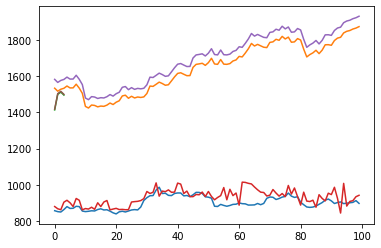

In [39]:
#Actual Data vs Prediciton 
plt.plot(X_forecast)
plt.plot(Y_forecast)
plt.plot(Z_forecast)
plt.plot(predictX)
plt.plot(predictY)
plt.plot(predictZ)


In [0]:
Last = H_PLA['Date'][H_PLA.index[-1]]
t = pd.to_datetime(Last) + timedelta(days=1)
d = pd.to_datetime(Last) - timedelta(days=forecast_out/5*7-1)
t.strftime('%Y-%m-%d')
d.strftime('%Y-%m-%d')
NewX = pd.bdate_range(start=d, end=Last )
NewX = pd.DataFrame(NewX, columns=['Date'])
NewX['Price'] = predictX
#NewX

Last = H_PAL['Date'][H_PAL.index[-1]]
t = pd.to_datetime(Last) + timedelta(days=1)
d = pd.to_datetime(Last) - timedelta(days=forecast_out/5*7-1)
t.strftime('%Y-%m-%d')
d.strftime('%Y-%m-%d')
NewY = pd.bdate_range(start=d, end=Last )
NewY = pd.DataFrame(NewY, columns=['Date'])
NewY['Price'] = predictY

NewZ = pd.DataFrame()
Last = H_GLD['Date'][H_GLD.index[-int(forecast_out/5*7/30)]]
t = pd.to_datetime(Last) + timedelta(days=1)
t.strftime('%Y-%m-%d')
NewZ = pd.date_range(Last, periods=int(forecast_out/5*7/30), freq='M')
NewZ = pd.DataFrame(NewZ, columns=['Date'])
NewZ['Price'] = predictZ

In [41]:
#Visualization
fig = go.Figure()
fig.add_trace(go.Scatter(x=H_PLA.Date, y=H_PLA['Price'], name="Platinum Price",
                         line_color='deepskyblue'))
fig.add_trace(go.Scatter(x=NewX.Date, y=NewX['Price'], name="Platinum Prediction Price",
                         line_color='blue'))
fig.add_trace(go.Scatter(x=H_PAL.Date, y=H_PAL['Price'], name="Palladium Price",
                         line_color='greenyellow'))
fig.add_trace(go.Scatter(x=NewY.Date, y=NewY['Price'], name="Palladium Prediction Price",
                         line_color='green'))
fig.add_trace(go.Scatter(x=H_GLD.Date, y=H_GLD['Price (USD)'], name="Gold Price",
                         line_color='goldenrod'))
fig.add_trace(go.Scatter(x=NewZ.Date, y=NewZ['Price'], name="Gold Prediction Price",
                         line_color='gold'))
fig.update_layout(title_text='Time Series of Gold, Platinum, dan Palladium Prices',
                  xaxis_rangeslider_visible=False,
                  xaxis_range=[H_PLA['Date'][H_PLA.index[-int(forecast_out/5*7)]],
                               '2020-01-01'])
fig.show()


Source Code : https://medium.com/@randerson112358/predict-stock-prices-using-python-machine-learning-53aa024da20a

## Analysis

In [42]:
import plotly.graph_objects as go

fig =go.Figure(go.Sunburst(
    labels=["Total", "Supply", "Demand", "Gold", "Platinum", "Palladium", "Gold", "Platinum", "Palladium"],
    parents=["", "Total", "Total", "Supply", "Supply", "Supply", "Demand", "Demand", "Demand"],
    values=[S_PLA['Total Supply'][0]+S_PAL['Total Supply'][0]+S_GLD['Supply'][4], S_GLD['Supply'][4]+ S_PLA['Total Supply'][0]+S_PAL['Total Supply'][0],
            S_GLD['Demand'][4] + S_PLA['Total Demand'][0] +S_PAL['Total Demand'][0], S_GLD['Supply'][4], S_PLA['Total Supply'][0],
            S_PAL['Total Supply'][0], S_GLD['Demand'][4], S_PLA['Total Demand'][0], S_PAL['Total Demand'][0]]
))
fig.update_layout(title_text='Supply and Demand of Gold, Platinum, dan Palladium', margin = dict(t=100, l=0, r=0, b=0))

fig.show()

In [43]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = ["Gold", "Platinum", "Palladium"]

fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Supply', 'Demand'])
fig.add_trace(go.Pie(labels=labels, values=[S_GLD['Supply'][4], S_PLA['Total Supply'][0],
            S_PAL['Total Supply'][0]], scalegroup='one',
                     name="Total Supply"), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=[S_GLD['Demand'][4], S_PLA['Total Demand'][0], S_PAL['Total Demand'][0]], scalegroup='one',
                     name="Total Demand"), 1, 2)

fig.update_layout(title_text='Supply and Demand 2013')
fig.show()


Dari data-data yang telah diolah dan diproses terlihat bahwa logam platinum saat ini berada pada harga yang cukup rendah dibanding logam lainnya. Sebaliknya, saat ini palladium berada dalam posisi paling tinggi dan cenderung naik. Di sisi lain, emas berada dalam kondisi stabil dan naik perlahan.

Prediction model dengan machine learning menghasilkan hasil yang mendekati aslinya dan akurasi yang cukup tinggi. Namun, hal ini berbeda ketika jumlah hari yang diprediksi menjadi jauh lebih besar (1000) maka nilai akurasi akan turun, dan harga prediksi menjadi tidak stabil. Sedangkan untuk performa regression jauh lebih cepat, namun untuk data yang kompleks svm lebih unggul.

Di sisi supply dan demandnya terlihat suatu pola dimana kenaikan harga palladium ini disebabkan akibat meningkatnya nilai demand dan menurunnya tingkat supply.

Sedangkan pada platinum perbedaan supply dan demand tidak terlalu jauh.Penurunan harga platinum dapat dikaitkan dengan persaingan dengan kedua logam lain yaitu emas dan palladium, dimana ketika kedua logam mengalami kenaikan harga, platinum justru semakin menurun.

Lalu, emas memiliki jumlah demand dan supply yang sangat stabil dimana beberapa kali terjadi irisan anatar supply dan demandnya. Sehingga nilainya juga cenderung stabil dan naik secara perlahan / wajar.


**Related News Analysis:**

1.  Platinum Price due to demand : https://www.miningreview.com/platinum-group-metals/platinum-investment-demand-performance-highlight-for-2019/
2.  Palladium Price due to supply : https://www.kitco.com/news/2019-12-13/Palladium-may-lose-some-altitude-but-expected-to-remain-at-lofty-heights.html
3. Gold Price stable : https://www.kitco.com/news/2019-12-16/Gold-prices-near-steady-amid-better-global-risk-appetite.html

Berdasarkan berita yang tersedia harga palladium akan tetap cukup tinggi meskipun tidak mengalamai kenaikan seperti sebelumnya, hal ini karena supply palladium masih deficit jauh dari permintaannya.

Harga emas juga diperkirakan akan mendekati stabil.

Platinum akan mengalami kenaikan di tahun 2019 dan akan datang. Hal ini dikarenakan meningkatkan permintaan terutama dari pasar perhiasan.
